# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import statsmodels.api as sm

df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
df

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

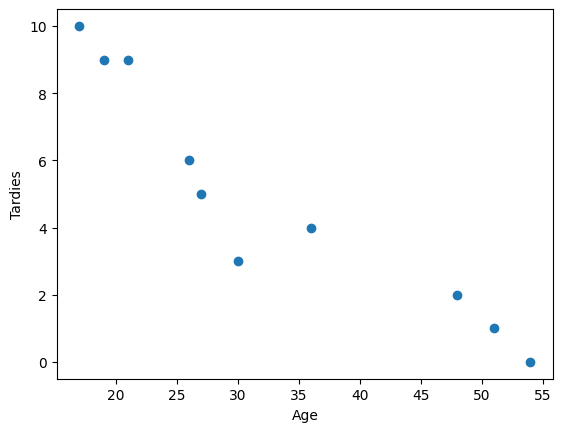

In [2]:
# Your code here.
plt.scatter(df["Age"],df["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here.
'''
There is a negative correlation between Age and Tardies. When Age goes up Tardies go down.
'''

'\nThere is a negative correlation between Age and Tardies. When Age goes up Tardies go down.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
import numpy as np
np.cov(df["Age"],df["Tardies"])
df.corr()

x=df["Age"]
y=df["Tardies"]

# add a constant to x to include the intercept in the regression
x = sm.add_constant(x)

# fit the regression model
model = sm.OLS(y,x)
results = model.fit()

# print the regression results
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        09:49:39   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [96]:
# Your response here.
'''
Y = -0.2428 * x + 0.031

Y axis coef is 3.4051.
std err is 1.628.
'''

'\nY = 3.4051 * x + 1.628\n\nY axis coef is 3.4051.\nstd err is 1.628.\n'

Plot your regression model on your scatter plot.

<AxesSubplot: xlabel='Age', ylabel='Tardies'>

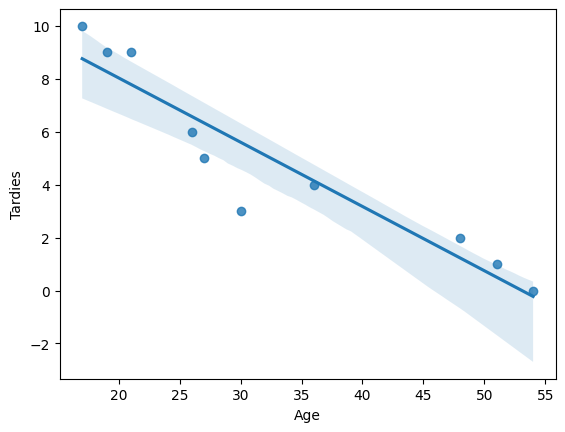

In [6]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=df)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [98]:
# Your response here. 
'''
Age is a good predictor of tardiness. There is easy to see correlation.
'''

'\nAge is a good predictor of tardiness. There is easy to see correlation.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [99]:
# Import any libraries you may need & the data
df2 = pd.read_csv("vehicles.csv")
df2.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [100]:
# Your response here.
import statsmodels.api as sm

X=df2[["Year","Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
X

X = sm.add_constant(X)
# Y=Target variable (dependent variable)
model = sm.OLS(df2["CO2 Emission Grams/Mile"],X)
results = model.fit()
predictions = results.predict(X)

In [101]:
#sns.regplot(x=df["CO2 Emission Grams/Mile"], y="Fuel Cost/Year", data=df)
#we don't visualise this one

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

C:\Users\berka\AppData\Local\Temp\ipykernel_18572\187211345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<AxesSubplot: >

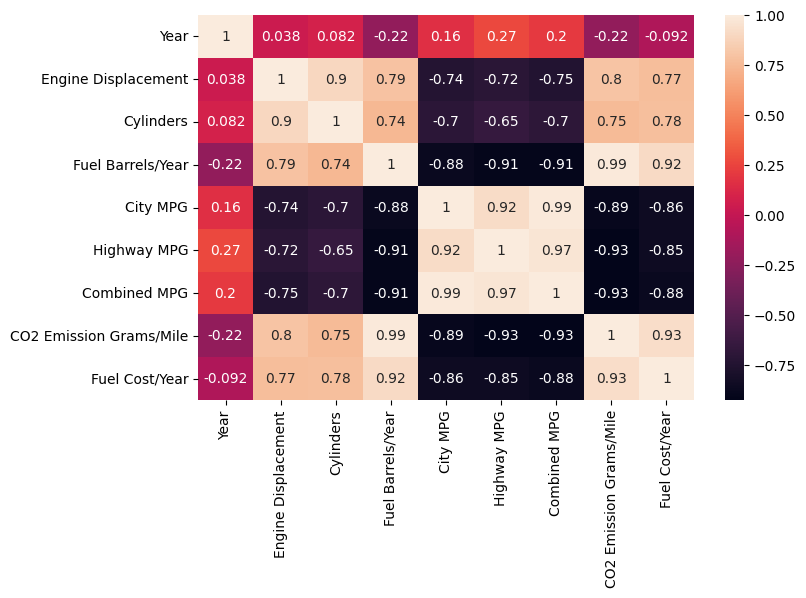

In [102]:
# Your response here.
fig=plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),annot=True)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [103]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:47:58   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
import statsmodels.api as sm
# Your code here.
data2 = {'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
df2=pd.DataFrame.from_dict(data2)
df2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot: xlabel='X', ylabel='Y'>

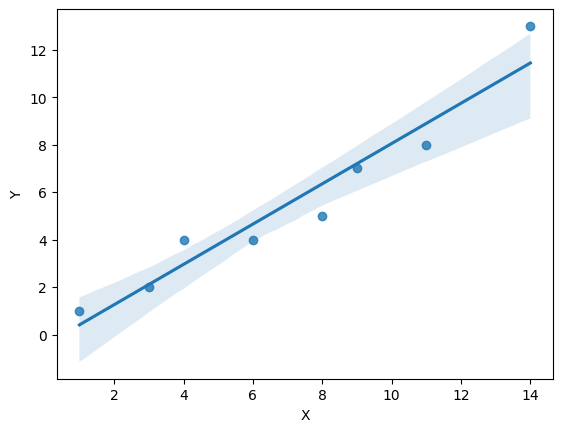

In [37]:
# Your code here.
sns.regplot(x=df2["X"], y=df2["Y"], label="X Y")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [38]:
# Your response here.
X = df2["X"]
Y = df2["Y"]


slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  #return multiple values
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [39]:
# Your response here.
# code to find outliers
stat = df2.describe().transpose()
stat['IQR'] = stat['75%'] - stat['25%']
outliers = pd.DataFrame(columns=df2.columns)
for col in stat.index:
    iqr = stat.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stat.at[col,'25%'] - cutoff
    upper = stat.at[col,'75%'] + cutoff
    results = df2[(df2[col] < lower) |
                   (df2[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

C:\Users\berka\AppData\Local\Temp\ipykernel_7856\1636064937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\berka\AppData\Local\Temp\ipykernel_7856\1636064937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)


,X,Y,Outlier
7,14,13,Y


<AxesSubplot: xlabel='X', ylabel='Y'>

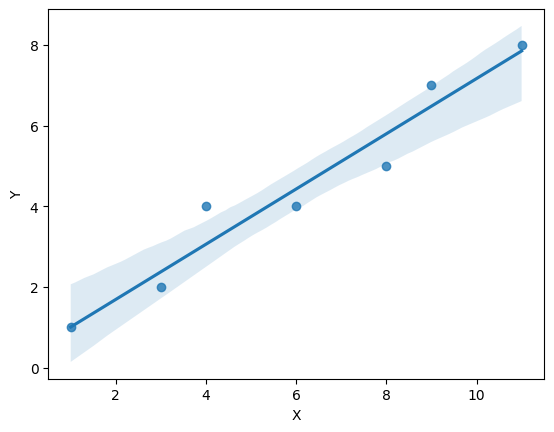

In [30]:
data3 = {'X': [1, 3, 4, 6, 8, 9, 11], 'Y': [1, 2, 4, 4, 5, 7, 8]}
df3=pd.DataFrame.from_dict(data3)
sns.regplot(x=df3["X"],y=df3["Y"])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [32]:
# Your response here.
X3 = df3["X"]
Y3 = df3["Y"]
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X3, Y3)  #return multiple values
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.6842105263157895
The intercept is: 0.32330827067669166
